In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.getcwd()  # 현재 경로

'D:\\OneDrive - knu.ac.kr\\GitHub\\coding\\학석사\\ML팀\\학회발표'

In [6]:
os.chdir("D:\\OneDrive - knu.ac.kr\\학석사\\ML_학회발표")  # 디렉토리 변경

In [20]:
os.listdir()  # 현재 디렉토리의 파일 목록 확인

['Jing et al. - 2021 - COVID-19 modelling by time-varying transmission rate associated with mobility trend of driving via Apple Maps-annotated.pdf',
 'KakaoTalk_20220906_154503044.png',
 'Kim et al. - 2021 - Determination of critical decision points for COVID-19 measures in Japan-annotated-annotated.pdf',
 'Lee et al. - 2021 - Association between traffic inflow and COVID-19 prevalence at the provincial level in South Korea-annotated.pdf',
 '~$구글 mobility data.xlsx',
 '구글 mobility data.xlsx',
 '시각화.ipynb',
 '중요변수탐색_예시.ipynb',
 '통신 모바일 인구이동량 통계(2022년 7월 1주차).xlsx',
 '확진자 수 데이터.xlsx']

In [8]:
df = pd.read_excel('mobility_data.xlsx')

In [9]:
df = df[['Date', 'count', 'seoul_residential']]  #날짜, 확진자 수, 서울 주택지?

In [10]:
df = df.iloc[:600, :]  # 600행까지 seoul_residential 

In [11]:
df_date = df.set_index('Date')  # set_index 함수 : 데이터프레임의 인덱스 지정
# Date 열 1개를 인덱스로 지정

In [12]:
df_date = df_date.resample('W-Fri').sum() # 주간 합계산 
# resample은 Datetime Index를 원하는 주기로 나누어주는 메서드 
# W-Fri는 리샘플링 할 기준으로 매주 금요일 

In [13]:
df_date

,count,seoul_residential
Date,,
2020-02-21,128,23
2020-02-28,1860,66
2020-03-06,4256,69
2020-03-13,1685,62
2020-03-20,611,56
...,...,...
2021-09-10,12037,16
2021-09-17,12358,12
2021-09-24,13000,45


<Figure size 2160x1440 with 0 Axes>

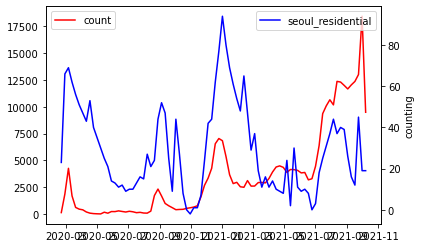

In [17]:
plt.figure(figsize = (30, 20)) # fitsize(가로길이, 세로길이)
fig, ax = plt.subplots()  # 하나의 ax 만을 가지는 하나의 figure 생성
ax.plot(df_date['count'], color = 'red', label = 'count')
plt.legend()  # 범례 추가

ax1 = ax.twinx()
ax1.plot(df_date['seoul_residential'], color = 'blue', label = 'seoul_residential')
plt.legend()
plt.xlabel('Date')
plt.ylabel('counting')

plt.show()

In [18]:
df

,Date,count,seoul_residential
0,2020-02-15,0,3
1,2020-02-16,2,4
2,2020-02-17,0,5
3,2020-02-18,2,2
4,2020-02-19,34,2
...,...,...,...
595,2021-10-02,2220,3
596,2021-10-03,2057,1
597,2021-10-04,1650,13
598,2021-10-05,1555,0


In [19]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [20]:
import statsmodels.api as sm  # 선형 회귀분석 패키지

cc = sm.tsa.stattools.ccf(df['count'], df['seoul_residential'] ,adjusted = False)

In [21]:
cc[:50]  # 50일씩?

array([ 0.11320593,  0.08854412,  0.08680476,  0.08921334,  0.10176541,
        0.10422175,  0.0916885 ,  0.08670783,  0.05801153,  0.04568318,
        0.02977796,  0.02812385,  0.02574328,  0.01187951,  0.00203887,
       -0.03245569, -0.0425377 , -0.0600342 , -0.04819491, -0.04292101,
       -0.05033888, -0.05731684, -0.07429074, -0.08145661, -0.08489498,
       -0.07691681, -0.07067589, -0.07365065, -0.08036352, -0.09902063,
       -0.11196145, -0.11455818, -0.10777036, -0.0973534 , -0.09796823,
       -0.10339977, -0.12866685, -0.14062051, -0.1443061 , -0.13084708,
       -0.11868052, -0.1264953 , -0.13645506, -0.15733361, -0.16414257,
       -0.17527793, -0.1626678 , -0.15834662, -0.15546027, -0.16135296])

In [22]:
result = []

for i in range(1, 13):  # 12 * 50의 데이터프레임 만들기 위함
    c1 = cc[50 * (i-1) : 50 * i]
    result.append(c1)

In [23]:
result = pd.DataFrame(result);result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.113206,0.088544,0.086805,0.089213,0.101765,0.104222,0.091688,0.086708,0.058012,0.045683,...,-0.118681,-0.126495,-0.136455,-0.157334,-0.164143,-0.175278,-0.162668,-0.158347,-0.155460,-0.161353
1,-0.184860,-0.188305,-0.197210,-0.182126,-0.173196,-0.173884,-0.176449,-0.198407,-0.204740,-0.210807,...,-0.216777,-0.214089,-0.233765,-0.242367,-0.241247,-0.224837,-0.211032,-0.207217,-0.201103,-0.219981
2,-0.221145,-0.217189,-0.202456,-0.190695,-0.183360,-0.174852,-0.188771,-0.192566,-0.190153,-0.177952,...,-0.153794,-0.191913,-0.182360,-0.172755,-0.167084,-0.155810,-0.147672,-0.146825,-0.165099,-0.162428
3,-0.168723,-0.150505,-0.135722,-0.130566,-0.133149,-0.166720,-0.166004,-0.162609,-0.146808,-0.128189,...,0.042458,0.043747,0.044345,0.060747,0.095386,0.110940,0.107246,0.093995,0.098062,0.094831
4,0.110693,0.145059,0.160555,0.158620,0.146339,0.145179,0.142131,0.172191,0.221180,0.222677,...,0.245882,0.239154,0.250330,0.275309,0.278348,0.267774,0.246190,0.227167,0.223720,0.235300
5,0.256830,0.255487,0.244008,0.219771,0.207131,0.198404,0.207896,0.228960,0.229808,0.224930,...,-0.036895,-0.037730,-0.033479,-0.041492,-0.045725,-0.074866,-0.086494,-0.091972,-0.094036,-0.086208
6,-0.085578,-0.088486,-0.111014,-0.119379,-0.127772,-0.125880,-0.115145,-0.116462,-0.119887,-0.141599,...,-0.108352,-0.088835,-0.080080,-0.076510,-0.089517,-0.085697,-0.086120,-0.073743,-0.062716,-0.052222
7,-0.041137,-0.046087,-0.044777,-0.048706,-0.042407,-0.029787,-0.025720,-0.015749,-0.018948,-0.011236,...,-0.034472,-0.031764,-0.035330,-0.049071,-0.044377,-0.058522,-0.061956,-0.061377,-0.062880,-0.070364
8,-0.090057,-0.096354,-0.103383,-0.103370,-0.102936,-0.110289,-0.118512,-0.135779,-0.135300,-0.143226,...,-0.135511,-0.138169,-0.143493,-0.138736,-0.140117,-0.135890,-0.123633,-0.119617,-0.117492,-0.118366
9,-0.116794,-0.119934,-0.113678,-0.102477,-0.100636,-0.098786,-0.099550,-0.094101,-0.095213,-0.088996,...,0.083362,0.086897,0.088870,0.088336,0.100842,0.117814,0.124082,0.131591,0.132364,0.135172


In [24]:
seoul_residential = result

In [25]:
seoul_residential.to_csv('seoul_residential.csv')